In [1]:
import numpy as np
from scipy import integrate
from mpl_toolkits import mplot3d
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [2]:
%matplotlib inline
plt.close('all')

In [11]:
# SET BETA
beta = 0.5
Lambda = 1

def genThetas(n):
    # SET 'a' HERE
    a = 0
    # SET 'c' HERE
    c = 1
    thetas = stats.uniform(a,1-a).rvs(size=n).tolist()
    # In the paper they start from theta_1,
    # so I added a 0 to align the indices
    if c!=1:
      for i in range(len(thetas)):
        thetas[i] = inverseCDF(thetas[i],c)
    

    thetas.insert(0,0)
    
    return thetas

def inverseCDF(p,c):
    if p<1/2:
      return (c - np.sqrt(c**2 - 8*c*p + 8*p))/(4*(c - 1))
    else:
      return (-np.sqrt(c**2 + 8*c*(p - 1) - 8*p + 8) - 3*c + 4)/(4 - 4*c)


def genTaus(n):
    taus = stats.expon(scale=2*beta).rvs(size=n).tolist()
    #taus.append(numpy.random.exponential(scale=2*beta,size=))
    # In the paper they start from tau_1,
    # so I added a 0 to align the indices
    taus.insert(0,0)
    return taus

def genGamma(n):
  return np.random.gamma(n,scale=2*beta)

def growthFunction(m0,t):
#     v = 1
#     return (m0 + v*t)
    k = 1
    # return m0*np.exp(Lambda*t)
    return m0+(t**k)


    
    





Final mass:
1.9624807040471015


Text(0, 0.5, 'Mass')

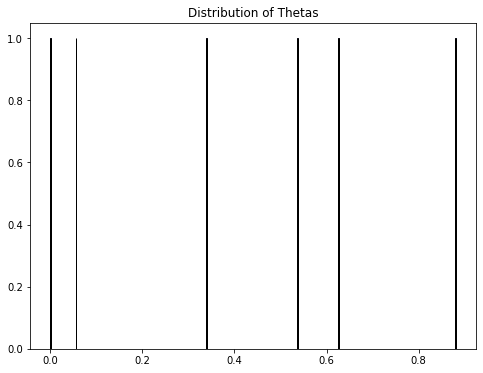

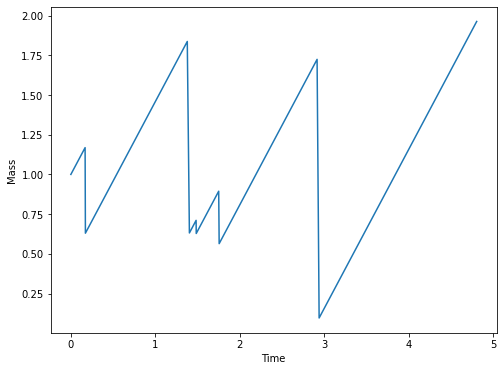

In [12]:
m0 = 1
n = 5

def simulate(n,m0):
    times = []
    times.append(0)
    mass = []
    mass.append(m0)
    
    theta = genThetas(n)
    fig, dx = plt.subplots(figsize=(8,6), sharex=False)
    plt.hist(theta, color = 'blue', edgecolor = 'black',bins = 500);
    plt.title("Distribution of Thetas")
    # We use n+1 to add the extra f(tau)
    tau = genTaus(n+1)
#     print(theta)
    # print(tau)
    # print(genGamma(n))
    T = []
    for i in range(n+2):
        T.append(sum(tau[:i+1]))
    
    for i in range(n):
        t = np.linspace(T[i],T[i+1],num=50)
        m_i = mass[-1]
        
        for j in range(1,len(t)):
            mass.append(growthFunction(m_i,t[j]-t[0]))
            times.append(t[j])
        mass[-1] = mass[-1]*theta[i+1]

    # Add f(tau)
    t = np.linspace(T[-2],T[-1],num=50)
    m_i = mass[-1]
        
    for j in range(1,len(t)):
        mass.append(growthFunction(m_i,t[j]-t[0]))
        times.append(t[j])
        
    return (times,mass)

times,mass = simulate(n,m0)

fig, ax = plt.subplots(figsize=(8,6), sharex=False)
ax.plot(times,mass)
print("Final mass:")
print(mass[-1])
ax.set_xlabel('Time')
ax.set_ylabel('Mass')

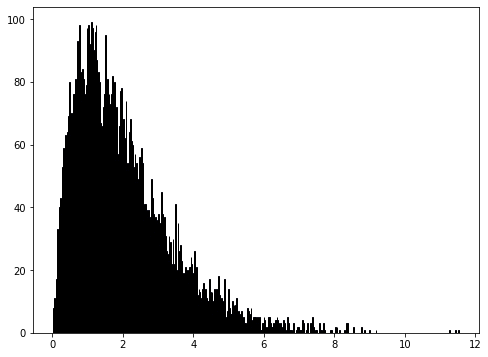

In [14]:
trials = 10000
n= 100
m0 = 1

def distribution(n,m0,trials):
    masses = []
    thetaList = genThetas(n*trials)
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = m0
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunction(mass,tau[i])
            mass = mass*theta[i]

        mass = growthFunction(mass,tau[-1])

        masses.append(mass)
    return masses

def distributionShortcut(n,m0,trials):
    masses = []
    for j in range(trials):
        mass = m0
        theta = genThetas(n)
        T_n = genGamma(n)
        mass = mass*np.exp(Lambda*T_n)

        for i in range(1,n):
            mass = mass*theta[i]

        masses.append(mass)
    #print(masses)
    return masses
        
mass = distribution(n,m0,trials)
fig, bx = plt.subplots(figsize=(8,6), sharex=False)
plt.hist(mass, color = 'blue', edgecolor = 'black',bins = 500);

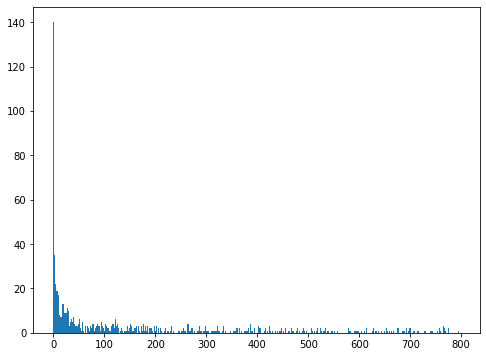

In [31]:
fig, cx = plt.subplots(figsize=(8,6), sharex=False)
plt.hist([x for x in mass if 0 <= x <= 800 ], bins=500);

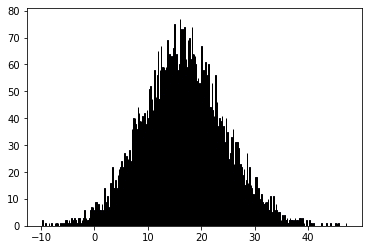

In [32]:
plt.hist(np.log(mass), color = 'blue', edgecolor = 'black',bins = 500);

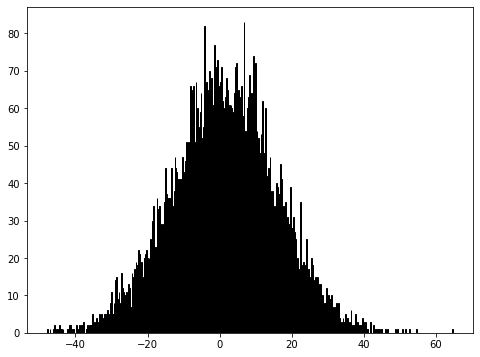

In [ ]:
trials = 10000
n= 100
m0 = 1


def logDistribution(n,m0,trials):
    masses = []
    for j in range(trials):
        logMass = 0
        theta = genThetas(n)
        T_n = genGamma(n)
        logMass = logMass + Lambda*T_n

        for i in range(1,n):
            logMass = logMass+np.log(theta[i])

        masses.append(logMass)
    #print(masses)
    return masses
        
mass = logDistribution(n,m0,trials)
fig, bx = plt.subplots(figsize=(8,6), sharex=False)
plt.hist(mass, color = 'blue', edgecolor = 'black',bins = 500);

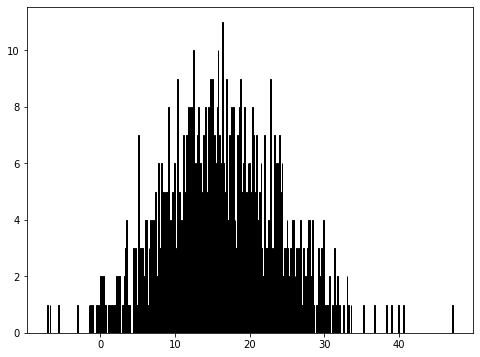

In [ ]:
# Polynomial Growth

trials = 1000
n= 100
m0 = 1
k = 1


def logDistribution(n,m0,trials):
    masses = []
    for j in range(trials):
        mass = m0
        theta = genThetas(n)
        tau = genTaus(n)
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunction(mass,tau[i])
            mass = mass*theta[i]

        masses.append(np.log(mass))
    return masses
        
mass = logDistribution(n,m0,trials)
fig, bx = plt.subplots(figsize=(8,6), sharex=False)
plt.hist(mass, color = 'blue', edgecolor = 'black',bins = 500);